In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

В файле Singers.xlsx находится список песен в исполнении различных певцов, а также продолжительность звучания каждой песни. Вычислите общее количество песен в исполнении Эминема и среднюю продолжительность звучания его песен. При добавлении новых данных все формулы должны обновляться автоматически.

In [7]:
singers = pd.read_excel('~/Study/excel/Ch25/Practice Files/Singers.xlsx',
                        skiprows=3, usecols=range(5,7), names=['singer', 'play'])

In [14]:
singers.head()

,singer,play
0,Eminem,2
1,Eminem,5
2,Cher,4
3,Eminem,4
4,Moore,4


In [13]:
singers.groupby('singer').agg(['count', 'mean']).loc['Eminem']

play  count    5.0
      mean     3.8
Name: Eminem, dtype: float64

***
В файле Tableexample.xlsx включите в лист ранг для каждого продавца согласно общей выручке и количеству проданных единиц товара. При добавлении новых данных ранги должны обновляться автоматически. Вероятно, стоит воспользоваться функцией РАНГ. Ее синтаксис в данном случае: РАНГ(число;массив;0). Эта функция возвращает ранг числа в массиве. У самого большого числа ранг равен 1.

In [21]:
table = pd.read_excel('~/Study/excel/Ch25/Practice Files/Tableexample.xlsx',
                        skiprows=4, usecols=range(4,8)).dropna()

In [38]:
table.assign(Rank=lambda x: x[['Revenue', 'Units']].apply(tuple, axis=1)
                                                   .rank(method='dense', ascending=False).astype(int))

,Name,Units,Revenue,Unit price,Rank
0,John,814.0,39886.0,49.0,1
1,Adam,594.0,26136.0,44.0,4
2,Dixie,528.0,13200.0,25.0,6
3,Tad,806.0,20956.0,26.0,5
4,Erica,826.0,27258.0,33.0,3
5,Gabrielle,779.0,28044.0,36.0,2
6,Amanda,400.0,5000.0,12.5,7


***
На основе данных в файле Stock.xlsx создайте гистограммы для ежемесячных доходов от акций GE и Intel.

In [2]:
stocks = pd.read_excel('~/Study/excel/Ch41/Practice Files/Stock.xlsx',
                        sheet_name='stockprices', skiprows=50, usecols=range(6))

In [49]:
stocks

,Date,Microsoft,GE,Intel,GM,CSCO
0,1990-03-30,0.121519,0.040486,0.037267,0.022284,0.010753
1,1990-04-30,0.047404,-0.003891,-0.053892,-0.035422,0.010638
2,1990-05-31,0.258621,0.083516,0.221519,0.115819,0.042105
3,1990-06-29,0.041096,0.005445,-0.025907,-0.020566,0.070707
4,1990-07-31,-0.125000,0.034296,-0.053191,-0.020997,-0.037736
...,...,...,...,...,...,...
125,2000-08-31,0.000000,0.140948,0.121948,0.276619,0.048711
126,2000-09-29,-0.136079,-0.014711,-0.444908,-0.099567,-0.194900
127,2000-10-31,0.141969,-0.049837,0.082707,-0.044231,-0.024887
128,2000-11-30,-0.166969,-0.095781,-0.153722,-0.195171,-0.111369


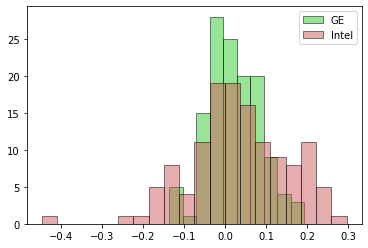

In [58]:
plt.hist(stocks["GE"], color='limegreen', alpha=0.5, 
         edgecolor="black", bins=10) 
plt.hist(stocks["Intel"], color='indianred', alpha=0.5, 
         edgecolor="black", bins=20)
plt.legend(["GE", 'Intel']);

***
В файле Deming.xlsx содержатся измерения диаметра (в дюймах) для 500 стержней, произведенных компанией Rodco, согласно отчету руководителя производства. Допустимый размер диаметра стержня составляет не менее 1дюйма. Раньше диаметрам стержней, производимых компанией Rodco, соответствовала симметричная гистограмма.
- Постройте гистограмму для этих измерений.
- Прокомментируйте любые необычные аспекты этой гистограммы.
Можно ли догадаться, что вызвало необычный вид гистограммы? (Подсказка: один из 14 принципов управления качеством Эдварда Деминга гласит: "Искорените страх".)

In [62]:
deming = pd.read_excel('~/Study/excel/Ch41/Practice Files/Deming.xlsx',
                       usecols=[1], names=['diameter'])

In [64]:
deming.head()

,diameter
0,1.005872
1,1.004461
2,1.011128
3,1.012668
4,1.018356


Правило Стёрджеса — эмпирическое правило определения оптимального количества интервалов, на которые разбивается наблюдаемый диапазон изменения случайной величины при построении гистограммы плотности её распределения. 

$${\displaystyle n=1+\lfloor \log _{2}N\rfloor }$$

In [94]:
n = 1 + int(3.321 * np.log10(len(deming))) # Формула Стерджеса через десятичный логарифм

In [9]:
get_nbins = lambda x: 1 + int(3.321 * np.log10(len(x)))

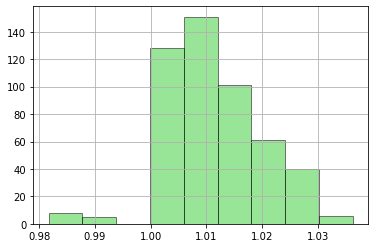

In [95]:
deming.diameter.hist(bins=n, color='limegreen', alpha=0.5, edgecolor='black');

***
В файле Unemployment.xlsx file находятся данные об уровне безработицы в США. Создайте на их основе гистограмму. Гистограмма уровня безработицы симметричная или асимметричная?

In [98]:
unemployment = pd.read_excel('~/Study/excel/Ch41/Practice Files/Unemployment.xlsx',
                             skiprows=3, usecols=range(2,6))

In [100]:
unemployment.head()

,Year,Month,Rate
0,1948,1,3.4
1,1948,2,3.8
2,1948,3,4.0
3,1948,4,3.9
4,1948,5,3.5


In [107]:
get_nbins = lambda x: 1 + int(3.321 * np.log10(len(x)))
n = get_nbins(unemployment)

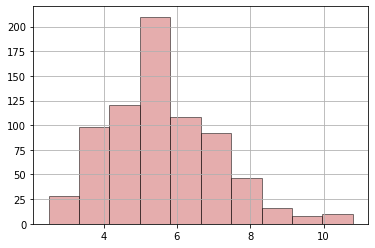

In [102]:
unemployment.Rate.hist(bins=n, color='indianred', alpha=0.5, edgecolor='black');

In [121]:
stats.skew(unemployment.Rate) # небольшая положительная асимметрия

0.5854259517217653

***
В файле Teams.xlsx содержатся данные о засчитанных пробежках в высшей баскетбольной лиге за сезон. Создайте на их основе гистограмму. Гистограмма, представляющая засчитанные пробежки, симметричная или асимметричная?

In [103]:
teams = pd.read_excel('~/Study/excel/Ch41/Practice Files/teams.xlsx',
                             skiprows=3, usecols=range(2,5))

In [105]:
teams.head()

,Year,Runs
0,2000,864
1,2000,794
2,2000,792
3,2000,978
4,2000,950


Цвета для графиков https://www.colorhexa.com/add8e6

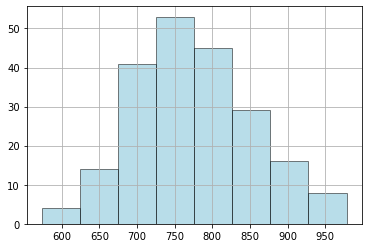

In [111]:
n = get_nbins(teams)
teams.Runs.hist(bins=n, color='#72bcd4', alpha=0.5, edgecolor='black');

In [117]:
import scipy.stats as stats

In [119]:
stats.skew(teams.Runs) # асимметрия отсутствует

0.17261131893063947

***
В файле NFLpoints.xlsx содержатся данные об очках, заработанных командами Национальной футбольной лиги за сезон. Создайте на их основе гистограмму. Гистограмма, представляющая заработанные очки, симметричная или асимметричная?

In [112]:
NFLpoints = pd.read_excel('~/Study/excel/Ch41/Practice Files/NFLpoints.xlsx',
                             skiprows=4, usecols=range(2,5))

In [115]:
NFLpoints.head()

,Rk,Tm,Pts
0,2003,Kansas City Chiefs,484
1,2003,Indianapolis Colts,447
2,2003,St. Louis Rams,447
3,2003,Green Bay Packers,442
4,2003,Tennessee Titans,435


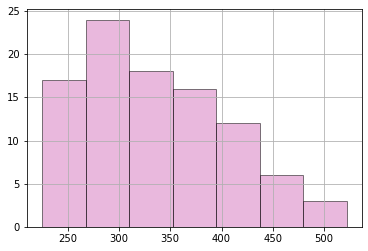

In [116]:
n = get_nbins(NFLpoints)
NFLpoints.Pts.hist(bins=n, color='#d472bc', alpha=0.5, edgecolor='black');

In [120]:
stats.skew(NFLpoints.Pts) # асимметрия со смещением вправо

0.4280836273050147

***
Получите описательную статистику для данных о доходности акций Intel и GE в файле Stock.xlsx.

In [4]:
stocks[['Intel', 'GE']].describe()

,Intel,GE
count,130.000000,130.000000
mean,0.032085,0.021175
std,0.118607,0.063657
min,-0.444908,-0.136511
25%,-0.031078,-0.020504
50%,0.027711,0.012955
75%,0.118150,0.064851
max,0.295267,0.192392


***
Компания City Power&Light производит оборудование для регулировки напряжения в Нью-Йорке и отправляет его в Чикаго. Регулятор напряжения считается годным, если он поддерживает напряжение от 25 до 75 вольт. Напряжение, поддерживаемое каждым устройством, измеряется в Нью-Йорке перед отправкой. После доставки оборудования в Чикаго напряжение измеряется снова. Результаты замеров напряжения в каждом городе приведены в файле Citypower.xlsx.
- С помощью описательной статистики прокомментируйте то, что вы узнали о поддерживаемом регуляторами напряжении до и после доставки.
- Каков процент годных устройств до и после доставки?
- Выскажите предложения по повышению качества регуляторов напряжения, производимых компанией City Power&Light.
- Какое значение напряжения было превышено десятью процентами регуляторов при измерении в Нью-Йорке?
- Какое значение напряжения не было превышено пятью процентами регуляторов при измерении в Нью-Йорке?

In [5]:
power = pd.read_excel('~/Study/excel/Ch42/Practice Files/Citypower.xlsx', skiprows=2, usecols=range(1,3))

In [7]:
power.describe()

,NY,CHICAGO
count,217.000000,217.000000
mean,50.179493,28.826590
std,8.051620,17.358888
min,30.050000,0.910000
25%,45.500000,15.590000
50%,50.000000,26.490000
75%,55.500000,37.440000
max,71.090000,87.800000


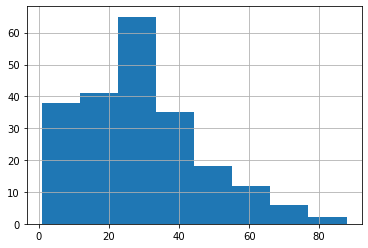

In [11]:
power['CHICAGO'].hist(bins=get_nbins(power['CHICAGO']));

In [27]:
power['CHICAGO'].apply(lambda x: 25 <= x <= 75).sum() / len(power) * 100 # % исправных изделий

53.91705069124424

In [104]:
# 90-й и 5-й процентили
power['NY'].quantile(.9), power['NY'].quantile(.05)

(61.02, 35.81)

***
В файле Decadeincome.xlsx приведены примеры доходов (в тысячах долларов 1980 г.) для нескольких семей в 1980 и 1990 гг. Предположим, что эти семьи являются репрезентативными для США. Республиканцы утверждают, что в 1990 г. страна стала богаче, чем в 1980 г., поскольку средний доход семьи увеличился. Согласны ли вы с этим утверждением?

In [30]:
incomes = pd.read_excel('~/Study/excel/Ch42/Practice Files/Decadeincome.xlsx', skiprows=1, usecols=range(1,3))

In [32]:
incomes.describe() # средний доход увеличился, но медианный уменьшился

,Income 1980,Income 1990
count,102.000000,102.000000
mean,46.666667,48.382353
std,38.178666,46.113086
min,1.000000,-3.000000
25%,17.750000,16.250000
50%,34.000000,32.500000
75%,70.750000,68.750000
max,165.000000,190.000000


***
С помощью описательной статистики сравните годовые доходы по акциям, казначейским векселям и корпоративным облигациям. Данные см.в файле Historicalinvest.xlsx.

In [42]:
invest = pd.read_excel('~/Study/excel/Ch42/Practice Files/Historicalinvest.xlsx', skiprows=6, usecols=range(4)) \
           .dropna()

**Среднее геометрическое**

$$G(x_{1},x_{2},\ldots ,x_{n})={\sqrt[ {n}]{x_{1}x_{2}\cdots x_{n}}}=\left(\prod _{{i=1}}^{n}x_{i}\right)^{{1/n}}$$

Для использования среднего геометрического при вычислении среднего годового дохода от инвестиций, необходимо добавить 1 к каждому годовому доходу и взять среднее геометрическое от получившихся в результате чисел. Затем вычесть 1 из результата и получить оценку среднего годового дохода по акции.

In [102]:
# среднее геометрическое доходностей
invest.loc[:, ['Stocks', 'T.Bills', 'T.Bonds']].apply(lambda x: (x + 1).prod() ** (1 / len(x)) - 1)

Stocks     0.101489
T.Bills    0.039142
T.Bonds    0.049596
dtype: float64

***
Сравните среднее, медиану и урезанное среднее (с урезанием 10% данных) для акций, казначейских векселей и корпоративных облигаций в файле Historicalinvest.xlsx.

In [105]:
from scipy import stats

In [107]:
invest[['Stocks', 'T.Bills', 'T.Bonds']].apply(lambda x: pd.Series([np.mean(x),
                                                                    np.median(x),
                                                                    stats.trim_mean(x, 0.1)],
                                                                    ['mean', 'median', 'trim_mean']
                                                                  ))

,Stocks,T.Bills,T.Bonds
mean,0.120526,0.039603,0.052149
median,0.142200,0.038400,0.036100
trim_mean,0.124928,0.036677,0.043966


***
В файле Dow.xlsx содержатся данные о ежемесячных доходах по 30 акциям крупнейших корпораций США за последние 20 лет. С помощью этих данных определите три акции с наибольшим средним ежемесячным доходом.

In [110]:
dow = pd.read_excel('~/Study/excel/Ch42/Practice Files/Dow.xlsx', skiprows=2).dropna()

In [112]:
dow.head()

,Date,AA,AIG,AXP,BA,C,CAT,DD,DIS,GE,...,MO,MRK,MSFT,PFE,PG,T,UTX,VZ,WMT,XOM
1,1986-08-01,0.096296,0.050093,0.098028,0.029596,0.096273,0.117634,0.083816,-0.056842,0.076986,...,0.055556,0.085634,0.000000,0.018727,0.033993,0.108804,0.115487,0.027211,0.010753,0.133663
2,1986-09-02,0.000000,-0.128975,-0.140898,-0.123193,-0.075127,-0.240577,-0.027316,-0.134341,-0.085856,...,-0.128289,-0.148071,-0.008772,-0.147059,-0.153125,-0.085182,-0.079119,-0.147417,-0.106383,-0.023523
3,1986-10-01,-0.016757,-0.008114,0.042380,-0.009367,0.073511,0.052798,0.073390,0.110886,0.060943,...,0.109434,0.102741,0.371681,0.030172,0.107011,0.011792,0.014911,0.038838,0.068571,0.011152
4,1986-11-03,-0.048103,-0.509202,-0.019215,-0.035552,-0.031386,-0.006269,0.039186,-0.017092,0.088525,...,0.010204,0.017308,0.283871,0.020921,0.036667,0.043077,0.040812,0.033647,0.061275,0.018382
5,1986-12-01,-0.021658,0.018833,-0.009370,0.002549,-0.008837,0.012617,-0.060087,0.000000,0.036145,...,-0.032054,0.120995,-0.030151,0.000000,-0.017749,0.003397,0.030697,-0.023438,-0.023725,0.012563


In [122]:
dow.mean(axis=0).rank(ascending=False).nsmallest(3)

INTC    1.0
MSFT    2.0
HD      3.0
dtype: float64

***
Для данных в файле Dow.xlsx определите три акции с самым высоким риском или изменчивостью.

In [123]:
dow.std(axis=0).rank(ascending=False).nsmallest(3)

INTC    1.0
MSFT    2.0
HPQ     3.0
dtype: float64

Для данных в файле Dow.xlsx определите три акции с самой большой асимметрией.

In [131]:
dow.drop(['Date'], axis=1).apply(stats.skew).abs().rank().nsmallest(3)

IBM    1.0
GM     2.0
JPM    3.0
dtype: float64

Для данных в файле Dow.xlsx определите, насколько урезанные средние доходы (с урезанием 10% доходов) отличаются от общих средних доходов?

In [140]:
dow.drop(['Date'], axis=1).apply(lambda x: stats.trim_mean(x, 0.1) - np.mean(x))

AA      0.003507
AIG     0.006971
AXP     0.008306
BA      0.006359
C       0.004482
CAT     0.005175
DD      0.003233
DIS     0.005281
GE      0.007143
GM      0.002151
HD      0.007105
HON     0.004748
HPQ     0.003222
IBM     0.000126
INTC    0.008890
JNJ     0.006722
JPM     0.003010
KO      0.005964
MCD     0.007185
MMM     0.005028
MO      0.006778
MRK     0.006095
MSFT    0.004540
PFE     0.007099
PG      0.008708
T       0.004690
UTX     0.008691
VZ      0.001676
WMT     0.006689
XOM     0.004050
dtype: float64

***
Компания Contoso, Ltd. производит микрочипы. При производстве было выяв- лено пять типов дефектов (обозначенных 1—5). Чипы производятся двумя операторами (A и B) на четырех станках (1—4). Имеется выборка данных о дефектных чипах, включающая тип дефекта, имя оператора, номер станка и день недели, в который дефект был обнаружен. На основе этих данных определите действия, которые требуется совершить для повышения качества продукции. Для расслоения дефектов с учетом типа дефекта, дня недели, применяемого станка и работавшего оператора следует использовать сводные таблицы. Возможно, потребуется разбивка данных по станкам, операторам и т. д. Предполагается, что каждый оператор и каждый станок произвели одинаковое количество продукции. Исходные данные хранятся в файле Contoso.xlsx.

In [150]:
contoso = pd.read_excel('~/Study/excel/Ch43/Practice Files/Contoso.xlsx', skiprows=2, usecols=range(2,6))

In [152]:
contoso.head()

,Operator,Machine,Day,Defect
0,A,1,Monday,1
1,A,1,Monday,1
2,A,1,Monday,1
3,A,1,Monday,1
4,A,1,Monday,2


In [173]:
contoso.groupby('Day')['Defect'].count() / len(contoso)

Day
Friday       0.200000
Monday       0.163636
Thursday     0.163636
Tuesday      0.181818
Wednesday    0.290909
Name: Defect, dtype: float64

In [175]:
contoso.groupby('Defect')['Day'].count() / len(contoso)

Defect
1    0.393939
2    0.260606
3    0.193939
4    0.127273
5    0.024242
Name: Day, dtype: float64

In [176]:
contoso.groupby('Machine')['Day'].count() / len(contoso)

Machine
1    0.369697
2    0.206061
3    0.224242
4    0.200000
Name: Day, dtype: float64

In [177]:
contoso.groupby('Operator')['Day'].count() / len(contoso)

Operator
A    0.575758
B    0.424242
Name: Day, dtype: float64

In [179]:
contoso.pivot_table(index=['Operator', 'Machine'], columns=['Defect'], aggfunc='count', margins=True)

Day                    
Defect             1   2   3   4  5  All
Operator Machine                        
A        1        24  14  12  10  1   61
         2        12  11   7   3  1   34
B        3        16  10   6   4  1   37
         4        13   8   7   4  1   33
All               65  43  32  21  4  165

In [215]:
t = contoso.pivot_table(index=['Day'], columns=['Defect'], values='Machine',
                        aggfunc='count', fill_value=0, margins=True)

In [216]:
(
    t.div(t.iloc[-1, :], axis=1).mul(100)
    .style
    .format("{:.2f}%")
    # .highlight_max(color='yellow')
)

Defect,1,2,3,4,5,All
Day,,,,,,
Friday,20.00%,11.63%,28.12%,28.57%,0.00%,20.00%
Monday,15.38%,13.95%,18.75%,14.29%,50.00%,16.36%
Thursday,18.46%,13.95%,15.62%,14.29%,25.00%,16.36%
Tuesday,23.08%,11.63%,21.88%,9.52%,25.00%,18.18%
Wednesday,23.08%,48.84%,15.62%,33.33%,0.00%,29.09%
All,100.00%,100.00%,100.00%,100.00%,100.00%,100.00%


***
Вы, владелец ресторана быстрого питания, произвели маркетинговое исследование в целях изучения клиентов. В случайной выборке для клиентов указаны доход, пол и сколько дней в неделю они посещают рестораны быстрого питания. На основе этой информации определите, как пол и доход влияют на частоту посещения ресторанов быстрого питания. Данные находятся в файле McDonalds.xlsx.

In [241]:
#xls = pd.ExcelFile('~/Study/excel/Ch43/Practice Files/McDonalds.xlsx')
mac = pd.read_excel('~/Study/excel/Ch43/Practice Files/McDonalds.xlsx',
                     skiprows=1, usecols=range(4,7), sheet_name='Sheet1')

In [243]:
mac.head()

,Gender,Frequency,Income
0,Man,4,30
1,Man,4,58
2,Man,6,48
3,Woman,6,58
4,Woman,5,53


In [244]:
mac.groupby('Gender')['Frequency'].mean()

Gender
Man      3.405063
Woman    3.507246
Name: Frequency, dtype: float64

In [279]:
mac['Groups'] = pd.cut(mac.Income, bins=[20, 40, 60, 80, 100],
                       labels=['20-39', '40-59', '60-79', '80-99'], right=False)

In [280]:
mac.groupby('Groups')['Frequency'].mean()

Groups
20-39    2.740741
40-59    4.666667
60-79    2.629630
80-99    2.142857
Name: Frequency, dtype: float64

In [281]:
mac.pivot_table(index='Gender', columns='Groups', values='Frequency', aggfunc='mean', margins=True)

Groups,20-39,40-59,60-79,80-99,All
Gender,,,,,
Man,2.764706,4.620690,2.733333,2.000000,3.405063
Woman,2.700000,4.709677,2.500000,2.250000,3.507246
All,2.740741,4.666667,2.629630,2.142857,3.452703


Мы видим, что для каждого уровня дохода мужчины и женщины посещают Макдональдс примерно одинаковое количество раз.
Также и у мужчин, и у женщин наиболее частыми посетителями являются люди с доходом от 40 до 60 тысяч долларов.

***
Студенты Школы изящных искусств подали заявления на изучение или английского языка или методов научного исследования. Необходимо определить, проводит ли Школа изящных искусств политику дискриминации в отношении женщин при приеме студентов на обучение с учетом их выбора. О студентах Школы изящных искусств имеются следующие данные:
- женщина (Female) или мужчина (Male);
- предпочитаемая дисциплина: английский (Eng) или методы научного исследования (Sci);
- принят? (Yes или No).

При условии, что женщины обладают равной с мужчинами квалификацией в каждой из дисциплин, свидетельствуют ли эти данные о дискриминации женщин? Используйте всю доступную информацию. Данные хранятся в файле Finearts.xlsx.

In [290]:
finearts = pd.read_excel('~/Study/excel/Ch43/Practice Files/Finearts.xlsx',
                     skiprows=2, usecols=range(3,7))

In [291]:
finearts.head()

,Gender,Major,Admit?
0,Female,Eng,Yes
1,Female,Eng,Yes
2,Female,Eng,Yes
3,Female,Eng,Yes
4,Female,Eng,Yes


In [293]:
t = finearts.pivot_table(index='Gender', columns='Admit?', aggfunc='count', margins=True)
(
    t.div(t.iloc[-1, :], axis=1).mul(100)
     .style
     .format("{:.2f}%")
)

In [300]:
t = finearts.assign(Counts=1).pivot_table(index=['Major', 'Gender'], columns='Admit?',
                                          aggfunc='count', margins=True)

(
    t.div(t.iloc[:, -1], axis=0).mul(100)
     .style
     .format("{:.2f}%")
)

In [303]:
t = finearts.assign(Counts=1).pivot_table(index=['Gender'], columns='Major', values='Admit?',
                                          aggfunc='count', margins=True)

(
    t.div(t.iloc[:, -1], axis=0).mul(100)
     .style
     .format("{:.2f}%")
)

Major,Eng,Sci,All
Gender,,,
Female,80.00%,20.00%,100.00%
Male,30.00%,70.00%,100.00%
All,55.00%,45.00%,100.00%


Заметно, что в целом примерно одинаковый процент мужчин и женщин допускаются к выбору своей области. Однако по каждой специальности допущено значительно меньшее количество женщин, что указывает на возможную дискриминацию. Причина, по которой общий процент допущенных женщин оказался высоким, заключается в том, что в основном женщины выбирают более легкую специальность (английский язык).
***

Вам поручено оценить качество медицинской помощи, оказанной пациентам с сердечными приступами в больницах Emergency Room (ER) и Chicago Hope (CH). За последние месяцы получены следующие данные о пациентах:
- больница (ER или CH);
- категория риска (High или Low). Пациенты с высокой категорией риска выживают с меньшей вероятностью, чем пациенты с низкой категорией риска;
- исход для пациента (Live или Die).

На основе этих данных определите, в какой из больниц качество оказания медицинской помощи пациентам с сердечными приступами выше. Подсказка: используйте все доступные данные. Данные находятся в файле Hospital.xlsx.

In [306]:
hospital = pd.read_excel('~/Study/excel/Ch43/Practice Files/Hospital.xlsx',
                         skiprows=2, usecols=range(4,8))

In [308]:
hospital.head()

,Hospital,Risk Category,Outcome
0,ER,High,Die
1,ER,High,Die
2,ER,High,Die
3,ER,High,Die
4,ER,High,Die


In [311]:
t = hospital.pivot_table(index='Hospital', columns='Outcome', aggfunc='count', margins=True)

(
     t.div(t.iloc[:, -1], axis=0).mul(100)
     .style
     .format("{:.2f}%")
)

In [314]:
t = hospital.assign(Counts=1).pivot_table(index=['Risk Category', 'Hospital'],
                                          columns='Outcome', aggfunc='count', margins=True)

(
     t.div(t.iloc[:, -1], axis=0).mul(100)
     .style
     .format("{:.2f}%")
)

In [315]:
t = hospital.pivot_table(index='Hospital', columns='Risk Category', aggfunc='count', margins=True)

(
     t.div(t.iloc[:, -1], axis=0).mul(100)
     .style
     .format("{:.2f}%")
)

Мы видим, что для каждой категории риска показатели ER лучше. В целом ER имеет более высокий уровень смертности; это связано с тем, что они обслуживают гораздо большую часть пациентов с высоким риском, чем CH. Эта аномалия имеет важное значение для анализа качества медицинской помощи. Вы всегда в плюсе, если лечите только здоровых людей. По этой причине в Нью-Йорке кардиохирурги вывозили пациентов из группы высокого риска за пределы штата.

***
Дан ежемесячный уровень индекса Доу-Джонса для 1947—1992 гг. Отражают ли эти данные какие-либо необычные сезонные закономерности доходности акций? Подсказка: месяц (январь, февраль и т. д.) можно извлечь с помощью формулы =ТЕКСТ(A4,"МММ"), скопированной в любой столбец. Данные к заданию находятся в файле Dow.xlsx.

In [322]:
dow = pd.read_excel('~/Study/excel/Ch43/Practice Files/Dow.xlsx',
                    skiprows=2, usecols=range(3,8)).rename(columns={'Unnamed: 6': 'Month Index'})

In [334]:
dow.head()

,Month,Closing DOW,Return,Month Index
0,1947-01-01,176.10,0,Jan
1,1947-02-01,181.54,0.0308915,Feb
2,1947-03-01,176.66,-0.0268811,Mar
3,1947-04-01,171.28,-0.030454,Apr
4,1947-05-01,168.67,-0.0152382,May


In [344]:
dow['Month Index'] = dow['Month'].dt.month

In [341]:
dow['Return'] = dow['Return'].astype('float64')

In [345]:
dow.groupby(['Month Index'])['Return'].mean()

Month Index
1     0.018624
2     0.005020
3     0.009580
4     0.012224
5     0.003611
6     0.000815
7     0.005494
8     0.004262
9    -0.000152
10   -0.003151
11    0.003538
12    0.010285
Name: Return, dtype: float64

Обратите внимание, что январь имеет самую большую среднемесячную доходность. Январская доходность является выбросом, поскольку она более чем на два стандартных отклонения выше, чем среднемесячная доходность в 0,005888. Эта аномалия известна как «эффект января» и еще не получила удовлетворительного объяснения.

***
Файл Makeupdb.xlsx содержит информацию о продажах косметики. Для каждой сделки имеются следующие данные:
- имя продавца;
- дата продажи;
- продукт;
- количество;
- выручка;
- регион.

Создайте сводную таблицу, объединяющую следующую информацию:
- число сделок для каждого продавца;
- общую выручку по продуктам для каждого продавца;
- на основе предыдущего создайте функцию, которая всегда возвращает данные о продаже помады для Джен (Jen);
- общую выручку для каждого продавца с разбивкой по регионам;
- общую выручку по каждому продавцу и году. (Подсказка: необходимо сгруппировать данные по годам.)

In [395]:
makeupdb = pd.read_excel('~/Study/excel/Ch43/Practice Files/Makeupdb.xlsx',
                         skiprows=2, usecols=range(3,11))

In [397]:
makeupdb.head()

,Trans Number,Name,Date,Product,Units,Dollars,Location
0,1,Betsy,2004-04-01,lip gloss,45,137.204558,south
1,2,Hallagan,2004-03-10,foundation,50,152.007303,midwest
2,3,Ashley,2005-02-25,lipstick,9,28.719483,midwest
3,4,Hallagan,2006-05-22,lip gloss,55,167.075323,west
4,5,Zaret,2004-06-17,lip gloss,43,130.602872,midwest


In [398]:
makeupdb.groupby('Name')['Trans Number'].count()

Name
Ashley      197
Betsy       217
Cici        230
Colleen     206
Cristina    207
Emilee      203
Hallagan    200
Jen         217
Zaret       214
Name: Trans Number, dtype: int64

In [402]:
products = makeupdb.pivot_table(index='Name', columns='Product', values='Dollars', aggfunc='sum', margins=True)
products

Product,eye liner,foundation,lip gloss,lipstick,mascara,All
Name,,,,,,
Ashley,5844.948744,4186.058628,6053.684565,3245.442978,6617.100349,25947.235264
Betsy,6046.534282,8043.486462,5675.650045,3968.605496,4827.253996,28561.530281
Cici,5982.823291,6198.248632,5199.949201,3148.840650,7060.711397,27590.573172
Colleen,3389.625314,6834.767608,5573.323725,2346.413777,6746.525368,24890.655792
Cristina,5397.273636,5290.989935,5297.979810,2401.668343,5461.646997,23849.558721
Emilee,7587.388980,5313.787561,5270.250313,2189.137568,4719.299731,25079.864154
Hallagan,6964.621074,6985.734333,5603.119378,3177.871325,5703.346670,28434.692781
Jen,7010.440514,5628.648036,5461.614790,3953.300132,6887.174950,28941.178422
Zaret,8166.749063,6451.650057,5670.329329,2448.707163,3879.949944,26617.385557


In [405]:
print("Jen's lipstick sales",  products.loc['Jen', 'lipstick'])

Jen's lipstick sales 3953.300131964638


In [417]:
makeupdb.groupby(['Name', 'Location'])['Dollars'].sum()

Name      Location
Ashley    east        7772.704761
          midwest     4985.896509
          south       7398.565792
          west        5790.068203
Betsy     east        8767.431725
          midwest     4878.085848
          south       7732.056980
          west        7183.955727
Cici      east        5956.320446
          midwest     8129.619289
          south       7174.448975
          west        6330.184462
Colleen   east        5713.069445
          midwest     6586.142169
          south       7785.632708
          west        4805.811471
Cristina  east        4126.268644
          midwest     5870.034488
          south       5964.158473
          west        7889.097115
Emilee    east        6295.472056
          midwest     5642.196163
          south       6050.594346
          west        7091.601589
Hallagan  east        4965.615813
          midwest     7378.321391
          south       8210.814251
          west        7879.941325
Jen       east        6949.20

In [422]:
makeupdb.groupby([makeupdb.Date.dt.year, 'Name'])['Dollars'].sum()

Date  Name    
2004  Ashley       9495.068134
      Betsy        9420.270725
      Cici         8965.262077
      Colleen      9361.385804
      Cristina     9132.086152
      Emilee       7805.647572
      Hallagan    10676.879035
      Jen          9049.299912
      Zaret        9078.507356
2005  Ashley       9547.543701
      Betsy        9788.728323
      Cici         9024.965709
      Colleen      7996.802973
      Cristina     7976.353025
      Emilee       9326.418545
      Hallagan     9102.484269
      Jen          8920.272064
      Zaret        8639.703793
2006  Ashley       6904.623429
      Betsy        9352.531233
      Cici         9600.345387
      Colleen      7532.467015
      Cristina     6741.119544
      Emilee       7947.798037
      Hallagan     8655.329478
      Jen         10971.606446
      Zaret        8899.174407
Name: Dollars, dtype: float64

Для 1985—1992 гг. даны ежемесячные ставки процента по облигациям, по которым деньги выплачиваются через год после покупки. Часто предполагают, что высокие ставки процента являются более подвижными. Соответствуют ли данные в файле Intratevolvolatility.xlsx этому утверждению? (Подсказка: в сводных таблицах можно отобразить стандартные отклонения.)

In [426]:
intratevolvo = pd.read_excel('~/Study/excel/Ch43/Practice Files/Intratevol-volatility.xlsx',
                             skiprows=3, usecols=range(1,5))

In [434]:
intratevolvo.Date = pd.to_datetime((intratevolvo.Date + 190000).astype(str), format="%Y%m")

In [438]:
intratevolvo

,Date,FYGT1,Change
0,1985-01-01,9.02,NaN
1,1985-02-01,9.29,0.27
2,1985-03-01,9.86,0.57
3,1985-04-01,9.14,-0.72
4,1985-05-01,8.46,-0.68
...,...,...,...
92,1992-09-01,3.18,-0.29
93,1992-10-01,3.30,0.12
94,1992-11-01,3.68,0.38
95,1992-12-01,3.71,0.03


In [439]:
intratevolvo.groupby(intratevolvo.Date.dt.quarter)['Change'].agg('std')

Date
1    0.278254
2    0.362599
3    0.314960
4    0.274793
Name: Change, dtype: float64

Обратите внимание, что стандартное отклонение изменения процентной ставки практически не меняется при изменении текущей ставки.

***
На основе данных в примере с продовольственными товарами подготовьте диаграмму, отображающую тенденцию продаж по годам для каждого магазина.

In [444]:
groceries = pd.read_excel('~/Study/excel/Ch43/Practice Files/Groceriespt.xlsx',
                             skiprows=1, usecols=range(2,10), sheet_name='Data')

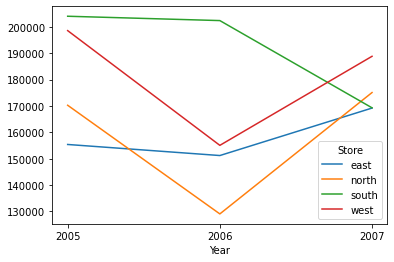

In [474]:
groceries.groupby(['Store', 'Year']).Revenue.sum().unstack().T.plot(xticks=sorted(groceries.Year.unique()));

***
Для примера с продовольственными товарами создайте вычисляемое поле для расчета средней цены единицы продукции для каждого продукта.

In [502]:
groceries.groupby(['Group', 'Product'])[['Units', 'Revenue']].sum().apply(lambda x: x[1] / x[0], axis=1)

Group      Product        
cereal     Cheerios           2.887607
           Raisin Bran        2.928449
           Special K          3.043903
fruit      apples             3.107909
           cherries           2.948987
           grapes             2.952156
           plums              3.046252
ice cream  Ben and Jerry's    3.057451
           Breyers            3.023237
           Edies              3.029878
milk       chocolate          2.969707
           low fat            2.961763
           skim               2.983331
           whole              2.855516
dtype: float64

***
Для примера с продовольственными товарами создайте сводную диаграмму, суммирующие продажи каждого продукта в каждом магазине за 2005 и 2006 гг.

In [505]:
groceries[groceries.Year.isin([2005, 2006])] \
         .groupby(['Year', 'Store', 'Group', 'Product']).Revenue.sum()

Year  Store  Group      Product    
2005  east   cereal     Cheerios        5055.80
                        Raisin Bran    19500.19
                        Special K       5998.21
             fruit      apples          3972.44
                        cherries        4051.22
                                         ...   
2006  west   ice cream  Breyers        12852.79
                        Edies           6588.16
             milk       low fat        19667.95
                        skim           11213.49
                        whole          15763.65
Name: Revenue, Length: 109, dtype: float64

***
На основе данных в файле Calcitemdata.xlsx создайте вычисляемые объекты, суммирующие продажи десертов (пирожные + пудинги) и фруктов (яблоки + виноград).

In [507]:
calcitem = pd.read_excel('~/Study/excel/Ch43/Practice Files/Calcitemdata.xlsx',
                             skiprows=1, usecols=range(4,7))

In [509]:
mapper = {
    'PUDDINGS': 'DESERTS',
    'CAKES': 'DESERTS',
    'APPLES': 'FRUITS',
    'GRAPES': 'FRUITS'
}

In [508]:
calcitem

,Product,Sales
0,PUDDINGS,22
1,CAKES,32
2,APPLES,42
3,GRAPES,52
4,PUDDINGS,62
5,CAKES,72
6,APPLES,82
7,GRAPES,92
8,PUDDINGS,102
9,CAKES,112


In [511]:
calcitem.groupby(calcitem.Product.map(mapper)).sum()

,Sales
Product,
DESERTS,402
FRUITS,522


***
Файл Ptablepartsdata.xlsx содержит данные продаж различных запчастей. Код для каждой запчасти начинается или с Part (для комплектующей) или с Comp (для компьютера). Создайте сводную таблицу, отображающую продажи только для комплектующих. (Подсказка: используйте фильтр по подписи.)

In [514]:
parts = pd.read_excel('~/Study/excel/Ch43/Practice Files/Ptablepartsdata.xlsx', names=['part', 'count'])

In [515]:
parts.head()

,part,count
0,Comp915,43
1,Part353,68
2,Comp88,61
3,Part820,59
4,Part848,67


In [528]:
parts = pd.concat([parts['count'], parts.part.str.extract(r'(?P<group>[A-Za-z]+)(?P<num>[0-9]+)',
                                                                                  expand=True)], axis=1)

In [530]:
parts.query("group == 'Part'")

,count,group,num
1,68,Part,353
3,59,Part,820
4,67,Part,848
6,50,Part,849
7,76,Part,734
...,...,...,...
346,41,Part,47
347,75,Part,94
349,43,Part,763
352,99,Part,364


***
На основе данных к заданию 14 просуммируйте общие продажи для комплектующих и компьютеров.

In [531]:
parts.groupby('group')['count'].sum()

group
Comp    11710
Part    12456
Name: count, dtype: int64

***
Файл Cigarettedata.xlsx содержит данные выборки для американцев: возраст, информацию о том, курят ли они и что именно, сигареты или сигары, а также умерли ли они в текущем году. Какие выводы можно сделать на основании этих данных?

In [532]:
cigaret = pd.read_excel('~/Study/excel/Ch43/Practice Files/cigarettedata.xlsx', skiprows=5, usecols=range(3,7))

In [533]:
cigaret.head()

,Smokes?,Age,Live?
0,cigar,70,live
1,cigar,64,live
2,cigar,56,live
3,cigar,51,die
4,cigar,72,live


In [535]:
cigaret.Age.agg(['max', 'min'])

max    80
min    20
Name: Age, dtype: int64

In [548]:
cigaret['Age group'] = pd.cut(cigaret.Age, bins=range(20, 90, 10),
                                           labels=['20-29', '30-39', 
                                                   '40-49', '50-59',
                                                   '60-69', '70-80'],
                                           right=False)

In [549]:
t = cigaret.assign(Count=1).pivot_table(index=['Smokes?', 'Age group'],
                                        columns='Live?',
                                        values='Count',
                                        aggfunc='sum',
                                        margins=True).dropna()
(
     t.div(t.iloc[:, -1], axis=0).mul(100)
     .style
     .format("{:.2f}%")
)

***
В файле Collegedata.xlsx находится следующая информация о студентах, подавших заявления в аспирантуру университета Kelley University: пол, желательная специализация, было ли заявление принято или отклонено. Созданная должным образом сводная таблица показывает, что женщин было принято меньше, чем мужчин. Существует ли в этом университете дискриминация женщин?

In [552]:
college = pd.read_excel('~/Study/excel/Ch43/Practice Files/Collegedata.xlsx', skiprows=4, usecols=range(3,7))

In [553]:
college.head()

,Major,Male,Accepted?
0,1,M,A
1,1,M,A
2,1,M,R
3,1,M,A
4,1,F,A


In [554]:
t = college.assign(Count=1).pivot_table(index=['Major', 'Male'],
                                        columns='Accepted?',
                                        values='Count',
                                        aggfunc='sum',
                                        margins=True)
(
     t.div(t.iloc[:, -1], axis=0).mul(100)
     .style
     .format("{:.2f}%")
)

Здесь мы видим, что на cпециализацию 1 и 2 женщины принимаются чаще, на другие специальности женщины принимаются почти так же, как и мужчины. Таким образом, нет никаких доказательств того, что существовала дискрименация. Просто женщины сконцентрированы на лучших специальностях.

In [557]:
t = college.pivot_table(index='Male', columns='Accepted?', aggfunc='count', margins=True)

(
     t.div(t.iloc[:, -1], axis=0).mul(100)
     .style
     .format("{:.2f}%")
)

In [561]:
t = college.pivot_table(index='Male', columns='Major', aggfunc='count', margins=True)

(
     t.div(t.iloc[:, -1], axis=0).mul(100)
     .style
     .format("{:.2f}%")
)

80% женщин сконцентрированы на специальностях 3-5 и только 25% мужчин. Это самые сложные специальности, на которые можно попасть и женщины на них идут неохотно.

***
В файле AnalyzeSurveydata.xlsx содержатся ответы по шкале от 1 до 7 на различные вопросы анкеты о качестве обучения. Создайте сводную диаграмму, отображающую долю каждой оценки (1—7) в ответе на каждый вопрос. Отфильтруйте диаграмму для любого набора из трех вопросов на выбор.


In [562]:
survey = pd.read_excel('~/Study/excel/Ch43/Practice Files/AnalyzeSurveydata.xlsx', skiprows=6, usecols=range(1,5))

In [569]:
survey.head()

,Student ID,Question,Response
0,28,Outstanding teacher,5
1,15,Easy to follow,7
2,31,Prepared for class,4
3,30,I want to learn more in this area,4
4,23,I would recommend course to a friend,4


In [574]:
t = survey.pivot_table(index='Question', columns='Response', aggfunc='count', margins=True)

(
     t.div(t.iloc[:, -1], axis=0).mul(100)
     .style
     .format("{:.2f}%")
)

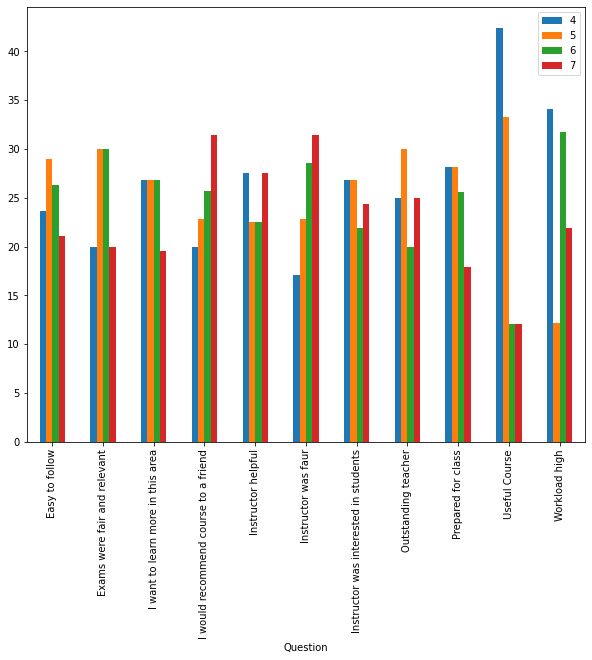

In [598]:
fig, ax = plt.subplots()
t.div(t.iloc[:, -1], axis=0).mul(100).iloc[:-1, :-1].plot(kind='bar',
                                                          figsize=(10, 8),
                                                          ax=ax);
ax.legend(sorted(survey.Response.unique()));

***
Для данных из файла MonthtoMonth.xlsx создайте сводную таблицу, в которой показано приведенное отличие каждой ежемесячной продажи от продажи за предыдущий месяц для 2010 г.

In [604]:
mtm = pd.read_excel('~/Study/excel/Ch43/Practice Files/MonthtoMonth.xlsx',
                    skiprows=4, usecols=range(5,8), sheet_name='data')

In [634]:
idx = pd.date_range(start='2010-01', freq='M', periods=12)
months = {name: i for i, name in enumerate(idx.month_name(), 1)}

In [640]:
revenue = mtm[mtm.Year == 2010].assign(Month_name=mtm.Month.map(months)).groupby('Month_name')['Revenue'].sum()

In [647]:
revenue_pct_change = revenue.pct_change()
revenue_pct_change.name = 'Pct change'

In [648]:
pd.concat([revenue, revenue_pct_change], axis=1)

,Revenue,Pct change
Month_name,,
1,84058,NaN
2,74896,-0.108996
3,41689,-0.443375
4,59910,0.437070
5,49345,-0.176348
6,42355,-0.141656
7,87516,1.066250
8,33060,-0.622241
9,48963,0.481034
